In [1]:
"""
    Author(s):
    Marcello Zanghieri <marcello.zanghieri2@unibo.it>
    
    Copyright (C) 2023 University of Bologna and ETH Zurich
    
    Licensed under the GNU Lesser General Public License (LGPL), Version 2.1
    (the "License");
    you may not use this file except in compliance with the License.
    You may obtain a copy of the License at
    
        https://www.gnu.org/licenses/lgpl-2.1.txt
    
    Unless required by applicable law or agreed to in writing, software
    distributed under the License is distributed on an "AS IS" BASIS,
    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    See the License for the specific language governing permissions and
    limitations under the License.
"""

import pickle

import numpy as np
import matplotlib.pyplot as plt

from semg_spike_regression.dataset import ninaprodb8 as db8

In [2]:
RESULTS_FILE = './results/results_gain_3.0e5_refractory_1ms.pkl'

with open(RESULTS_FILE, 'rb') as f:
    results_taus = pickle.load(f)
results_taus = results_taus['results_taus']

TAU_S_LIST = list(results_taus['tau_s'].keys())
NUM_TAUS = len(TAU_S_LIST)

In [3]:
mae = np.zeros((NUM_TAUS, db8.NUM_SUBJECTS, db8.NUM_DOA), dtype=np.float32)

for idx_tau in range(NUM_TAUS):
    for idx_subj in range(db8.NUM_SUBJECTS):

        mae[idx_tau, idx_subj] = results_taus['tau_s'][TAU_S_LIST[idx_tau]]['subject'][idx_subj]['valid']['mae_raw']

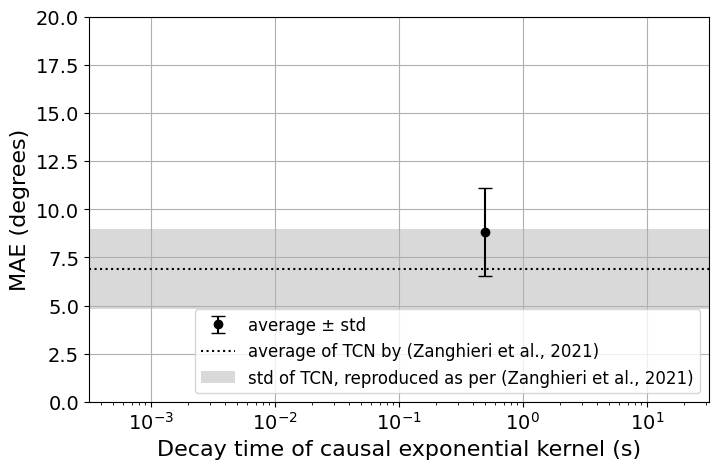

In [4]:
avg_tcn_deg = 6.89
std_tcn_deg = 2.0770888
yhi_tcn_deg = avg_tcn_deg + std_tcn_deg
ylo_tcn_deg = avg_tcn_deg - std_tcn_deg


plt.figure(figsize=(8.0, 5.0))
plt.xlabel("Decay time of causal exponential kernel (s)", fontsize=16)
plt.ylabel("MAE (degrees)", fontsize=16)

plt.errorbar(
    x=TAU_S_LIST,
    y=mae.mean((1, 2)),
    yerr=mae.std((1, 2)),
    xerr=None,
    fmt='ko',
    capsize=5.0,
    label="average ± std",
)

plt.axhline(
    y=avg_tcn_deg, c='k', ls=':',
    label="average of TCN by (Zanghieri et al., 2021)",
)
plt.fill_between(
    x=[0.0, 100.0], y1=yhi_tcn_deg, y2=ylo_tcn_deg,
    color='k', alpha=0.15, linewidth=0.0,
    label="std of TCN, reproduced as per (Zanghieri et al., 2021)",
)

handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]
plt.legend(handles, labels, loc='lower right', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.axis([10.0**-3.5, 10.0**1.5, 0.0, 20.0])
plt.xscale('log')

# plt.tight_layout()
# plt.savefig("./plot_mae.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
idx_best_mae = mae.mean((1, 2)).argmin()
print(idx_best_mae)
print(mae[idx_best_mae].mean())
print(mae[idx_best_mae].std())

0
8.839537
2.2815154
